In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
from matplotlib.colors import LinearSegmentedColormap

In [2]:
# Provide just the filename since it's in the same folder
filepath = "attacks.csv"

# read the CSV file
raw_df = pd.read_csv(filepath, encoding='latin1')

In [3]:
raw_df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-18,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-18,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,9-Jun-18,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,8-Jun-18,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,4-Jun-18,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [4]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             6302 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

In [5]:
raw_df.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [6]:
raw_df.columns = raw_df.columns.str.strip()
raw_df.columns = [x.lower().replace(" ", "_") for x in raw_df.columns]

raw_df.rename(columns={"fatal_(y/n)": "fatal"}, inplace=True)

In [7]:
raw_df.columns

Index(['case_number', 'date', 'year', 'type', 'country', 'area', 'location',
       'activity', 'name', 'sex', 'age', 'injury', 'fatal', 'time', 'species',
       'investigator_or_source', 'pdf', 'href_formula', 'href',
       'case_number.1', 'case_number.2', 'original_order', 'unnamed:_22',
       'unnamed:_23'],
      dtype='object')

In [8]:
# drop unnessary columns
cols = ['date', 'type', 'country', 'area', 'location', 'activity', 'sex', 'age', 'injury', 'fatal', 'time', 'species']
df = raw_df.loc[:, cols]
df.head()

,date,type,country,area,location,activity,sex,age,injury,fatal,time,species
0,25-Jun-18,Boating,USA,California,"Oceanside, San Diego County",Paddling,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark
1,18-Jun-18,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN
2,9-Jun-18,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN
3,8-Jun-18,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,M,NaN,Minor injury to lower leg,N,NaN,2 m shark
4,4-Jun-18,Provoked,MEXICO,Colima,La Ticla,Free diving,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m"


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      6302 non-null   object
 1   type      6298 non-null   object
 2   country   6252 non-null   object
 3   area      5847 non-null   object
 4   location  5762 non-null   object
 5   activity  5758 non-null   object
 6   sex       5737 non-null   object
 7   age       3471 non-null   object
 8   injury    6274 non-null   object
 9   fatal     5763 non-null   object
 10  time      2948 non-null   object
 11  species   3464 non-null   object
dtypes: object(12)
memory usage: 2.4+ MB


In [10]:
df["sex"].unique()

array(['F', 'M', nan, 'M ', 'lli', 'N', '.'], dtype=object)

In [11]:
# clean column 'sex'
# create a mask
sex_check = df.loc[df["sex"].isin(["nan", "lli", "N", "."])]

# print the rows there are in to view data
# print(sex_check) # with only 4 rows of data - feel safe to delete
df = df.drop(sex_check.index)

# now look at the 'M ' and change to standard 'M'
replace = {"M ": "M"}

# replace
df["sex"] = df["sex"].replace(replace)

# take a look after cleaning sex column -  should be M, F and nan
df.sex.unique()

array(['F', 'M', nan], dtype=object)

In [12]:
df.type.unique()

array(['Boating', 'Unprovoked', 'Invalid', 'Provoked', 'Questionable',
       'Sea Disaster', nan, 'Boat', 'Boatomg'], dtype=object)

In [13]:
# change to provoked and unprovoked

# clean column 'type'
# create a mask
type_check = df.loc[df["type"].isin(["Boatomg"])]

# print the rows there are in to view data
print(type_check) # shows just 1 row

# change 'Boatomg' to and 'Boat' to 'Boating'to condense data 
type_replace = {"Boatomg": "Boating", "Boat": "Boating"}

# replace
df["type"] = df.type.replace(type_replace)

# check unique valuse in type
df.type.unique()

          date     type      country          area  location activity sex  \
1152  1-Mar-09  Boatomg  NEW ZEALAND  North Island  Taranaki  Fishing   M   

      age                                       injury fatal time species  
1152  NaN  No injury to occupants, shark bit propeller     N  NaN     NaN  


array(['Boating', 'Unprovoked', 'Invalid', 'Provoked', 'Questionable',
       'Sea Disaster', nan], dtype=object)

In [14]:
df.fatal.unique()

array(['N', 'Y', nan, 'M', 'UNKNOWN', '2017', ' N', 'N ', 'y'],
      dtype=object)

In [15]:
# clean column 'fatal'
# create a mask
fatal_check = df.loc[df["fatal"].isin(["M", "2017"])]

# print the rows there are in to view data
print(fatal_check) # with only 2 rows of data - feel safe to delete
df = df.drop(fatal_check.index)

# take ' N ' 'N ' and 'y ' and fix typos
fatal_replace = {" N": "N", "N ": "N", "y": "Y"}

# replace
df.fatal = df.fatal.replace(fatal_replace)

# take a look after cleaning sex column -  should be M, F and nan
df.fatal.unique()

          date      type           country      area      location  \
285  18-Apr-16  Provoked  FRENCH POLYNESIA  Tuamotos  Makemo Atoll   
786  10-Jun-12  Provoked             ITALY  Sardinia      Muravera   

                                            activity sex age  \
285                                     Spearfishing   M  22   
786  Attempting to rescue an injured & beached shark   M  57   

                                                injury fatal     time  \
285  Laceration to knee by speared shark PROVOKED I...     M  Morning   
786           Lower left leg injured PROVOKED ACCIDENT  2017  Morning   

                  species  
285  Grey reef shark, 2 m  
786      Blue shark, 2.5m  


array(['N', 'Y', nan, 'UNKNOWN'], dtype=object)

In [18]:
# standardize column 'date'
# get rid of any words added to the date
df.date = df.date.astype(str)
df.loc[df["date"].str.startswith("Reported "), "date"] = df.date.str.replace("Reported ", "")

# standardize dates
df.date = pd.to_datetime(df.date, errors="coerce")
df.head(20)

/var/folders/4r/1qb0cvl95xl13_sqyl2vvzvm0000gn/T/ipykernel_57562/2743312903.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.date = pd.to_datetime(df.date, errors="coerce")


,date,type,country,area,location,activity,sex,age,injury,fatal,time,species
0,2018-06-25,Boating,USA,California,"Oceanside, San Diego County",Paddling,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark
1,2018-06-18,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN
2,2018-06-09,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN
3,2018-06-08,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,M,NaN,Minor injury to lower leg,N,NaN,2 m shark
4,2018-06-04,Provoked,MEXICO,Colima,La Ticla,Free diving,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m"
5,2018-06-03,Unprovoked,AUSTRALIA,New South Wales,"Flat Rock, Ballina",Kite surfing,M,NaN,"No injury, board bitten",N,NaN,NaN
6,2018-06-03,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,M,18,FATAL,Y,Late afternoon,Tiger shark
7,2018-05-27,Unprovoked,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,M,52,Minor injury to foot. PROVOKED INCIDENT,N,NaN,"Lemon shark, 3'"
8,2018-05-26,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",Walking,M,15,Lower left leg bitten,N,17h00,"Bull shark, 6'"
9,2018-05-26,Unprovoked,USA,Florida,"Daytona Beach, Volusia County",Standing,M,12,Minor injury to foot,N,14h00,NaN


In [19]:
# clean dates
df['date'] = pd.to_datetime(df['date'])
unique_years = df['date'].dt.year.unique()

# remove typoes from the dates
df['date'] = pd.to_datetime(df['date'])
unique_years = df['date'].dt.year.unique()
unique_years = unique_years.astype(int)
typos_mask = (unique_years > 2020)
print(unique_years[typos_mask])

# unique_years[typos_mask] -= 100
df = df[~(df['date'].dt.year > 2022)]

[2073 2072 2071 2070 2069 2068 2067 2066 2065 2064 2054 2063 2062 2061
 2060 2059 2058 2057 2056 2055 2053 2052 2051 2050 2049 2048 2047 2046
 2045 2044 2043 2042 2041 2040 2039 2038 2037 2036 2035 2034 2033 2032
 2031 2030 2029 2028 2027 2026 2025 2024 2023 2022 2021]


/var/folders/4r/1qb0cvl95xl13_sqyl2vvzvm0000gn/T/ipykernel_57562/320012998.py:8: RuntimeWarning: invalid value encountered in cast
  unique_years = unique_years.astype(int)


In [20]:
df.head()

,date,type,country,area,location,activity,sex,age,injury,fatal,time,species
0,2018-06-25,Boating,USA,California,"Oceanside, San Diego County",Paddling,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark
1,2018-06-18,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN
2,2018-06-09,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN
3,2018-06-08,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,M,NaN,Minor injury to lower leg,N,NaN,2 m shark
4,2018-06-04,Provoked,MEXICO,Colima,La Ticla,Free diving,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m"


In [21]:
# take a look at value counts of activity to see the differnt categories
df.activity.value_counts()

activity
Surfing                                                                                                                                                                   931
Swimming                                                                                                                                                                  657
Fishing                                                                                                                                                                   290
Spearfishing                                                                                                                                                              232
Bathing                                                                                                                                                                   137
                                                                                                                         

In [22]:
# create key words to search for to simplify activity values
activity_key_dict = {
    "Surf": "Surfing",
    "board": "Surfing",
    "Swim": "Swimming",
    "Rowing": "Boating",
    "Canoeingg": "Boating",
    "kayaking": "Boating",
    "boat": "Boating",
    "Cruising": "Boating",
    "Treading": "Swimming",
    "Fish": "Fishing",
    "Float": "Floating",
    "Kite": "Kitboarding",
    "Disaster": "Accident",
    "drifted": "Accident",
    "overboard": "Accident",
    "capsized": "Accident",
    "sank": "Accident",
    "wreck": "Accident",
    "crash": "Accident",
    "sunk": "Accident",
    "Navy": "Accident",
    "fell": "Accident",
    "sharks": "Handling a Shark",
    "shark": "Handling a Shark",
    "washing": "In Shallow Water",
    "playing": "In Shallow Water",
    "standing": "In Shallow Water",
    "sitting": "In Shallow Water",
    "splashing": "In Shallow Water",
    "jumped": "Entered Water",
    "jumping": "Entered Water",
    "Escaping": "Entered Water",
    "drill": "Entered Water",
    "diving": "Diving",
    "dived": "Diving",
    "Snorkeling": "Diving",
    "netting": "Fishing",
    "crabbing": "Fishing",
    "clamming": "Fishing",
    "Bathing": "Bathing",
    "SUP": "Paddleboarding"
}
# fill any null values
df["activity"] = df["activity"].fillna("Not Recorded")

# apply all search keys to values in activites to sort unique vaules into categories for plotting
for search_key, activity in activity_key_dict.items():
    contains_search_key = df.activity.str.contains(search_key, case=False)
    df.loc[contains_search_key, "activity"] = activity

# any specifically unique species values not categorized rename as other
unique_activity = df.activity.value_counts()[df.activity.value_counts() == 1].index.tolist()
df.loc[df.activity.isin(unique_activity), "activity"] = "Other"

# rename typoes and blank space
dotrow = df[df["activity"] == "."]
dot_activity = df[df["activity"] == "."].index
df.loc[dot_activity, "activity"] = "Other"

activity_spacerow = df[df["activity"] == ""]
activity_space = df[df["activity"] == ""].index
df.loc[activity_space, "activity"] = "Not Recorded"

/var/folders/4r/1qb0cvl95xl13_sqyl2vvzvm0000gn/T/ipykernel_57562/531516152.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["activity"] = df["activity"].fillna("Not Recorded")


In [23]:
df.activity.value_counts()

activity
Not Recorded                  19831
Surfing                        1397
Swimming                        797
Fishing                         742
Diving                          436
Bathing                         155
Boating                         145
Other                           136
Wading                          121
In Shallow Water                117
Accident                         97
Handling a Shark                 87
Floating                         34
Walking                          15
Entered Water                    15
Canoeing                         11
Sailing                           8
Murder                            6
Dangling feet in the water        5
Paddleskiing                      4
Paddleboarding                    3
Unknown                           3
Ocean racing                      2
Paddling                          2
Jet skiing                        2
Suicide                           2
Name: count, dtype: int64

In [24]:
df.activity.unique()

array(['Paddling', 'In Shallow Water', 'Surfing', 'Diving', 'Swimming',
       'Fishing', 'Walking', 'Handling a Shark', 'Other', 'Wading',
       'Not Recorded', 'Boating', 'Bathing', 'Canoeing', 'Paddleboarding',
       'Floating', 'Accident', 'Sailing', 'Entered Water', 'Jet skiing',
       'Murder', 'Unknown', 'Paddleskiing', 'Dangling feet in the water',
       'Ocean racing', 'Suicide'], dtype=object)

In [25]:
# show value counts of species 
df.species.value_counts()

species
White shark                                                                                                                      134
Shark involvement not confirmed                                                                                                   74
Shark involvement prior to death was not confirmed                                                                                62
Invalid                                                                                                                           61
Tiger shark                                                                                                                       58
                                                                                                                                ... 
5' to 7' shark                                                                                                                     1
12' to 18' shark                                             

In [26]:
# make any blank entries unknown species
df["species"] = df["species"].fillna("Not Recorded")

# create key words to search for to simplify species values
species_key_dict = {
    "bull": "Bull Shark",
    "tiger": "Tiger Shark",
    "lemon": "Lemon Shark",
    "nurse": "Nurse Shark",
    "white": "Great White Shark",
    "wobbegong": "Wobbegong Shark",
    "reef": "Reef Shark",
    "Blacktip": "Blacktip Shark",
    "Hammerhead": "Hammerhead Shark",
    "Mako": "Mako Shark",
    "Zambesi": "Zambesi Shark",
    "Raggedtooth": "Raggedtooth Shark",
    "not confirmed": "Unidentified",
    "unconfirmed": "Unidentified",
    "Invalid": "Unidentified",
    "Possibly": "Unidentified",
    "Probable": "Unidentified",
    "Unidentified": "Unidentified",
    "Unknown": "Unidentified",
    "Bronze": "Bronze Whaler Shark",
    "sand": "Sand Shark",
    "questionable": "No Shark Sighted",
    "doubtful": "No Shark Sighted",
    "not cofirmed": "No Shark Sighted",
    "pack": "Multiple Sharks",
    "school": "Multiple Sharks",
    "Multiple": "Multiple Sharks",
    "juvenile": "Juvenile Shark",
    "Blue pointer": "Mako Shark",
    "bonito": "Mako Shark",
    "Silvertip": "Silvertip Shark",
    "Porbeagle": "Porbeagle Shark",
    "Spinner": "Spinner Shark",
    "dogfish": "Dogfish Shark",
    "Squalidae": "Dogfish Shark",
    "Spurdogs": "Dogfish Shark",
    "Goblin": "Goblin Shark",
    "Dusky": "Dusky Shark",
    "basking": "Baskign Shark",
    "Scyliorhinus": "Dogfish Shark",
    "dog": "Dogfish Shark",
    "blue shark": "Great Blue Shark",
    "sevengill": "SevenGill Shark",
    "black tipped": "Black Tipped Shark",
    "Zambesi": "Zambesi Shark",
    "Copper": "Copper Shark",
    "bronze whaler": "Copper Shark",
    "narrowtooth": "Copper Shark",
    "whaler": "Dusky Shark",
    "Triakis semifasciata": "Leopard Shark",
    "Leopard": "Lepoard Shark",
    "angle": "Angleshark",
    "monkfish": "Angleshark",
    "\xa0": "Unidentified"
}

# apply all search keys to values in activites to sort unique vaules into 
for search_key, species in species_key_dict.items():
    contains_search_key = df.species.str.contains(search_key, case=False)
    df.loc[contains_search_key, "species"] = species

# function to rename all unreported species values or unknown species to 'unknown shark'
def rename_shark_species(species):
    if species[0].isdigit():
        return "Unknown Shark"
    elif " to " in str(species) or " m " in str(species):
        return "Unknown Shark"
    elif "small" in species or "large" in species:
        return "Unknown Shark"
    elif "Small" in species or "Large" in species:
        return "Unknown Shark"
    else: 
        return species
df.species = df.species.apply(rename_shark_species)

# any specifically unique species values not categorized rename as unknown
unknown_species = df.species.value_counts()[df.species.value_counts() == 1].index.tolist()
df.loc[df.species.isin(unknown_species), "species"] = "Unidentified"

spacerow = df[df['species'] == " "]
space_species = df[df["species"] == " "].index
df.loc[space_species, "species"] = "Unidentified"

/var/folders/4r/1qb0cvl95xl13_sqyl2vvzvm0000gn/T/ipykernel_57562/1096640705.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["species"] = df["species"].fillna("Not Recorded")
/var/folders/4r/1qb0cvl95xl13_sqyl2vvzvm0000gn/T/ipykernel_57562/1096640705.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.species = df.species.apply(rename_shark_species)


In [27]:
df.species.value_counts()

species
Not Recorded            21580
Unknown Shark             692
Great White Shark         521
Unidentified              364
Tiger Shark               222
Bull Shark                170
Blacktip Shark             78
No Shark Sighted           68
Reef Shark                 58
Nurse Shark                51
Copper Shark               50
Mako Shark                 41
Raggedtooth Shark          40
Wobbegong Shark            31
Hammerhead Shark           30
Lemon Shark                26
Great Blue Shark           22
No shark involvement       21
Spinner Shark              17
Sand Shark                 14
SevenGill Shark            12
Zambesi Shark              12
Dusky Shark                 9
Dogfish Shark               7
Juvenile Shark              7
Angel shark                 5
Porbeagle Shark             5
Baskign Shark               4
Galapagos shark             3
Multiple Sharks             3
Goblin Shark                2
Salmon shark                2
Seven-gill shark            2
Si

In [28]:
df.species.unique()

array(['Great White Shark', 'Not Recorded', 'Unknown Shark',
       'Tiger Shark', 'Lemon Shark', 'Bull Shark', 'Reef Shark',
       'Unidentified', 'Nurse Shark', 'No Shark Sighted',
       'Wobbegong Shark', 'Blacktip Shark', 'Great Blue Shark',
       'Spinner Shark', 'Porbeagle Shark', 'Seven-gill shark',
       'SevenGill Shark', 'Angel shark', 'Dogfish Shark', 'Mako Shark',
       'Copper Shark', 'No shark involvement', 'Galapagos shark',
       'Hammerhead Shark', 'Juvenile Shark', 'Raggedtooth Shark',
       'Goblin Shark', 'Sand Shark', 'Salmon shark', 'Zambesi Shark',
       'Dusky Shark', 'Baskign Shark', 'Silvertip Shark', 'Whale shark',
       'Multiple Sharks'], dtype=object)

In [29]:
df.species.nunique()

35

In [30]:
df.head(20)

,date,type,country,area,location,activity,sex,age,injury,fatal,time,species
0,2018-06-25,Boating,USA,California,"Oceanside, San Diego County",Paddling,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,Great White Shark
1,2018-06-18,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",In Shallow Water,F,11,Minor injury to left thigh,N,14h00 -15h00,Not Recorded
2,2018-06-09,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,M,48,Injury to left lower leg from surfboard skeg,N,07h45,Not Recorded
3,2018-06-08,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,M,NaN,Minor injury to lower leg,N,NaN,Unknown Shark
4,2018-06-04,Provoked,MEXICO,Colima,La Ticla,Diving,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,Tiger Shark
5,2018-06-03,Unprovoked,AUSTRALIA,New South Wales,"Flat Rock, Ballina",Surfing,M,NaN,"No injury, board bitten",N,NaN,Not Recorded
6,2018-06-03,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,M,18,FATAL,Y,Late afternoon,Tiger Shark
7,2018-05-27,Unprovoked,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,M,52,Minor injury to foot. PROVOKED INCIDENT,N,NaN,Lemon Shark
8,2018-05-26,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",Walking,M,15,Lower left leg bitten,N,17h00,Bull Shark
9,2018-05-26,Unprovoked,USA,Florida,"Daytona Beach, Volusia County",In Shallow Water,M,12,Minor injury to foot,N,14h00,Not Recorded


In [31]:
# view values of injury column
df.injury.unique()

array(['No injury to occupant, outrigger canoe and paddle damaged',
       'Minor injury to left thigh',
       'Injury to left lower leg from surfboard skeg', ...,
       'FATAL, leg stripped of flesh  ',
       'FATAL, knocked overboard by tail of shark & carried off by shark ',
       'FATAL. "Shark bit him in half, carrying away the lower extremities" '],
      dtype=object)

In [32]:
# make any blank entries unknown species
df.injury = df.injury.fillna("None Listed")

# create key words to search for and rename to simplify injury values
injury_key_dict = {
    "fatal": "Fatal",
    "killed": "Fatal",
    "arm": "Arm",
    "elbow": "Arm",
    "shoulder": "Arm",
    "leg": "Leg",
    "thigh": "Thigh",
    "shin": "Leg",
    "torso": "Torso",
    "chest": "Torso",
    "no injury": "No Injury",
    "foot": "Foot",
    "calf": "Calf",
    "ankle": "Ankle",
    "hand": "Hand",
    "fingers": "Hand",
    "finger": "Hand",
    "heel": "Foot",
    "toe": "Foot",
    "hip": "Hip",
    "wrist": "Hand",
    "knee": "Knee",
    "No Injury": "No Injury",
    "boat": "No Injury",
    "post-mortem": "No Injury",
    "Abdomen": "Torso",
    "drowning": "Drowned",
    "Drowned": "Drowned",
    "buttocks": "Hip",
    "buttock": "Hip",
    "back": "Torso",
    "post mortem": "Unconfirmed",
    "remains found": "Unconfirmed",
    "prior to death": "Unconfirmed",
    "Missing": "Unconfirmed",
    "head": "Head",
    "ribs": "Torso",
    "groin": "Hips",
    "cheek": "Head",
    "Calves": "Leg",
    "face": "Head",
    "thumb": "Hand",
    "femur": "Hip",
    "No inury": "No Injury",
    "PROVOKED": "Not Recorded",
    "not confirmed": "Unconfirmed",
    "Minor injuries": "Minor injury",
    "Abrasion": "Abrasions",
    "uninjured": "No Injury",
    "been taken": "Unconfirmed",
    "Swim fin": "Swimgear Bitten"
    
}

# apply all search keys to values in injury to sort unique vaules into assosicated categories
for search_key, injury in injury_key_dict.items():
    contains_search_key = df.injury.str.contains(search_key, case=False)
    df.loc[contains_search_key, "injury"] = injury

# any specifitally unique injury values not categorized rename as other
unique_injury = df.injury.value_counts()[df.injury.value_counts() == 1].index.tolist()
df.loc[df.injury.isin(unique_injury), "injury"] = "Other"

/var/folders/4r/1qb0cvl95xl13_sqyl2vvzvm0000gn/T/ipykernel_57562/73399788.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.injury = df.injury.fillna("None Listed")


In [33]:
df.injury.unique()

array(['No Injury', 'Thigh', 'Leg', 'Fatal', 'Foot', 'Hand', 'Arm',
       'Other', 'Ankle', 'Calf', 'Minor injury', 'Abrasions', 'Hip',
       'Torso', 'Drowned', 'Knee', 'Head', 'Unconfirmed', 'Not Recorded',
       'No details', 'Lacerations', 'None Listed', 'Survived', 'Hips',
       'Swimgear Bitten',
       'Disappeared, but shark involvement unconfirmed', 'Recovered'],
      dtype=object)

In [34]:
df.injury.value_counts()

injury
None Listed                                       19441
Fatal                                              1003
Foot                                                650
No Injury                                           621
Leg                                                 607
Arm                                                 408
Hand                                                313
Thigh                                               228
Other                                               177
Calf                                                168
Ankle                                                85
Survived                                             75
Torso                                                68
Drowned                                              63
Unconfirmed                                          46
Knee                                                 40
No details                                           33
Head                                     

In [35]:
df.columns

Index(['date', 'type', 'country', 'area', 'location', 'activity', 'sex', 'age',
       'injury', 'fatal', 'time', 'species'],
      dtype='object')

In [36]:
bar_graph_data = df[["sex", "activity"]].copy()
bar_graph_data.dropna(inplace=True)
bar_graph_data.head(20)

,sex,activity
0,F,Paddling
1,F,In Shallow Water
2,M,Surfing
3,M,Surfing
4,M,Diving
5,M,Surfing
6,M,Swimming
7,M,Fishing
8,M,Walking
9,M,In Shallow Water


In [37]:
df.groupby("age").size()

age
             2
10          47
10 or 12     1
11          33
12          59
            ..
mid-20s      1
mid-30s      1
teen         5
young        1
             1
Length: 121, dtype: int64

In [38]:
df.fatal.value_counts()

fatal
N          3319
Y           981
UNKNOWN      53
Name: count, dtype: int64

In [39]:
ages = ['57', '11', '48', '18', '52', '15', '12', '32', '10', '21',
       '34', '30', '60', '33', '29', '54', '41', '37', '56', '19', '25',
       '69', '38', '55', '35', '46', '45', '14', '28', '20', '24',
       '26', '49', '22', '7', '31', '17', '40', '13', '42', '3', '8',
       '50', '16', '82', '73', '68', '51', '39', '58',
       '47', '61', '65', '36', '66', '43', '9', '72', '59', '6',
       '27', '64', '23', '71', '44', '62', '63', '70', '53',
        '77', '74', '5', '86',
        '84', '75']
df2 = df.loc[df.age.isin(ages)]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2525 entries, 0 to 6301
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      2466 non-null   datetime64[ns]
 1   type      2524 non-null   object        
 2   country   2520 non-null   object        
 3   area      2454 non-null   object        
 4   location  2431 non-null   object        
 5   activity  2525 non-null   object        
 6   sex       2510 non-null   object        
 7   age       2525 non-null   object        
 8   injury    2525 non-null   object        
 9   fatal     2364 non-null   object        
 10  time      1792 non-null   object        
 11  species   2525 non-null   object        
dtypes: datetime64[ns](1), object(11)
memory usage: 256.4+ KB


In [40]:
df2["age"] = pd.to_numeric(df2["age"])
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2525 entries, 0 to 6301
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      2466 non-null   datetime64[ns]
 1   type      2524 non-null   object        
 2   country   2520 non-null   object        
 3   area      2454 non-null   object        
 4   location  2431 non-null   object        
 5   activity  2525 non-null   object        
 6   sex       2510 non-null   object        
 7   age       2525 non-null   int64         
 8   injury    2525 non-null   object        
 9   fatal     2364 non-null   object        
 10  time      1792 non-null   object        
 11  species   2525 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 256.4+ KB


/var/folders/4r/1qb0cvl95xl13_sqyl2vvzvm0000gn/T/ipykernel_57562/3601731725.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["age"] = pd.to_numeric(df2["age"])


In [41]:
age_df = df2.groupby("age").size().reset_index()
age_df.columns = ["age", "num_attacks"]
age_df.head()

,age,num_attacks
0,3,3
1,5,6
2,6,13
3,7,21
4,8,19


In [42]:
age_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   age          75 non-null     int64
 1   num_attacks  75 non-null     int64
dtypes: int64(2)
memory usage: 1.3 KB


In [43]:
#Data Visualizations

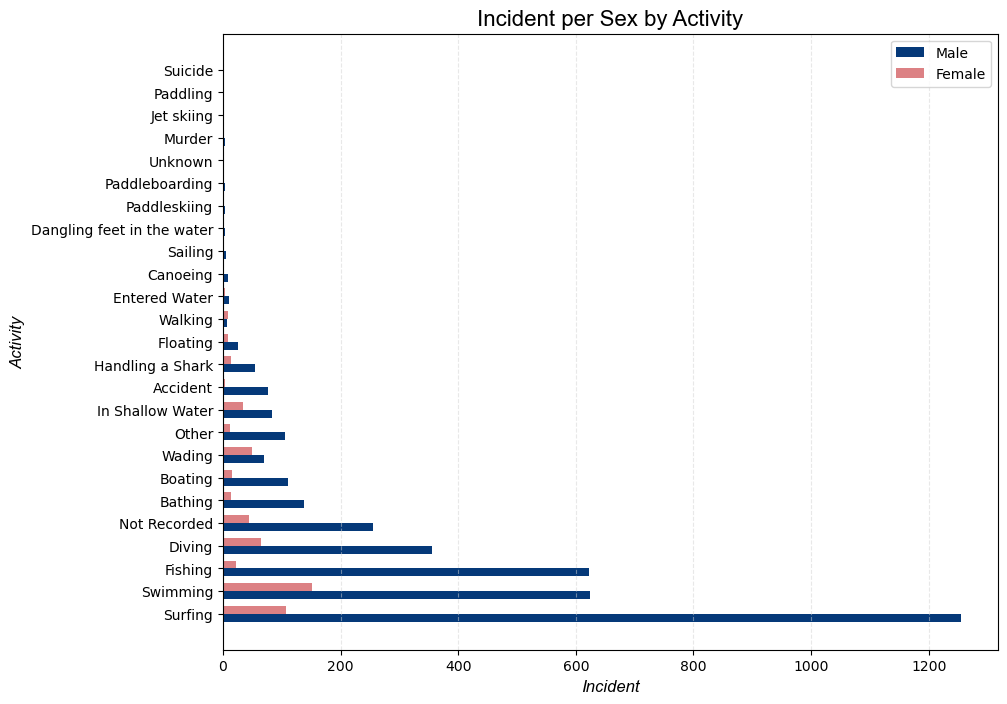

In [45]:
# create a bar graph to show the activity count per sex
# groupby data per activity and sex
activity_per_sex = bar_graph_data.groupby("activity")["sex"].value_counts().unstack(fill_value=0)

male = activity_per_sex["M"]
female = activity_per_sex["F"]

activity_per_sex_sorted = activity_per_sex.sum(axis=1).sort_values(ascending=False)
activities_sorted = activity_per_sex_sorted.index

bar_height = 0.35

r1 = range(len(activities_sorted))
r2 = [x + bar_height for x in r1]

# create canvas
plt.figure(figsize=(10,8))
plt.barh(r1, activity_per_sex.loc[activities_sorted, "M"], color="#053979", height=bar_height, label="Male")
plt.barh(r2, activity_per_sex.loc[activities_sorted, "F"], color="#dc8184", height=bar_height, label="Female")

# customize
plt.xlabel("Incident", fontsize=12, fontstyle="italic", fontfamily="Arial")
plt.yticks([r + bar_height/2 for r in range(len(activities_sorted))], activities_sorted)
plt.ylabel("Activity", fontsize=12, fontstyle="italic", fontfamily="Arial")
plt.title("Incident per Sex by Activity", fontsize=16, fontfamily="Arial")
plt.grid(axis="x", color="lightgrey", linestyle="--", alpha=.5)
plt.legend()
plt.show()

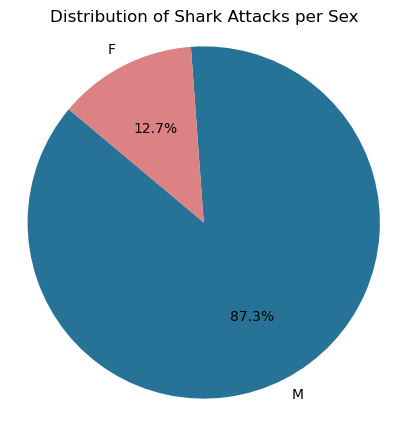

In [52]:
count_per_gender = df['sex'].value_counts()

colors = ["#277397", "#dc8184"]

plt.figure(figsize=(5, 5))
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribution of Shark Attacks per Sex')
plt.axis('equal')
plt.show()

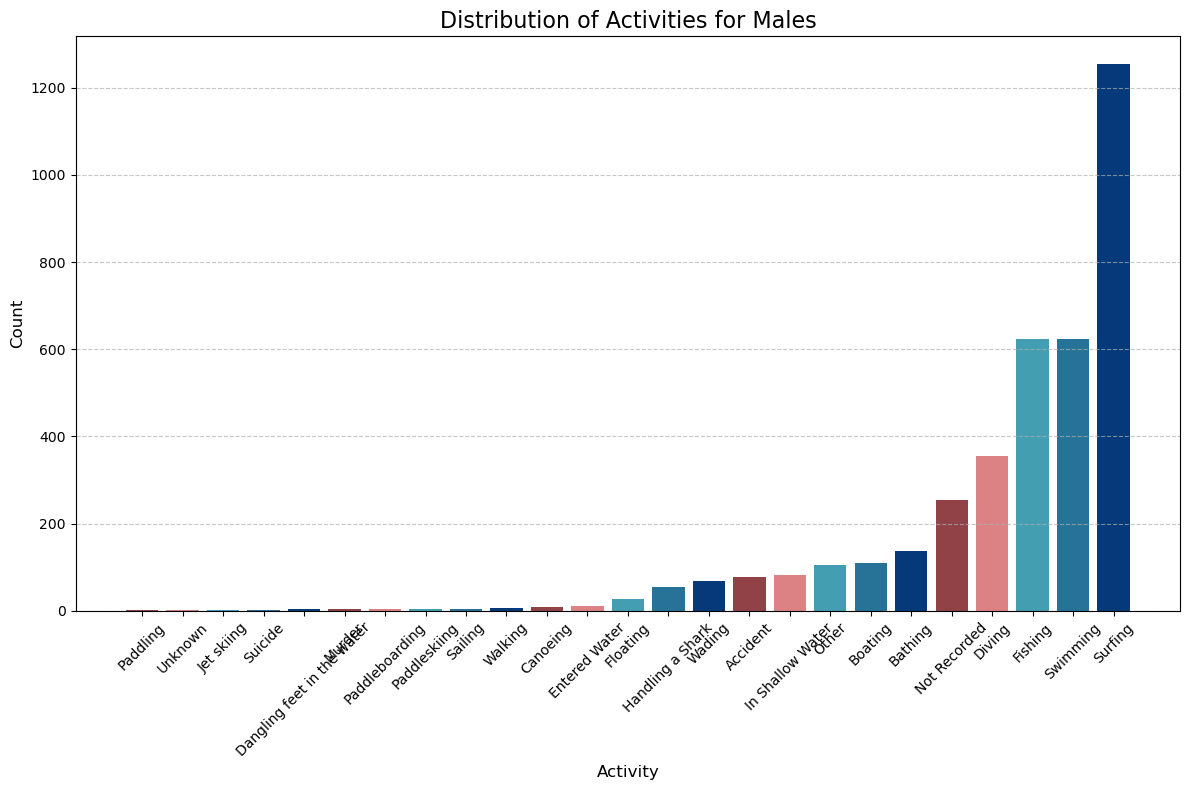

In [61]:
# Filter the data for males
male_data = df[df['sex'] == 'M']

# Count the occurrences of each activity for males
male_activity_counts = male_data['activity'].value_counts().sort_values(ascending=True)

# Define the colors for the bars
colors = ["#904247", "#dc8184", "#439eb1", "#277397", "#053979"]

# Create a bar graph with specified colors
plt.figure(figsize=(12, 8))
bars = plt.bar(male_activity_counts.index, male_activity_counts, color=colors)

plt.title('Distribution of Activities for Males', fontsize=16)
plt.xlabel('Activity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

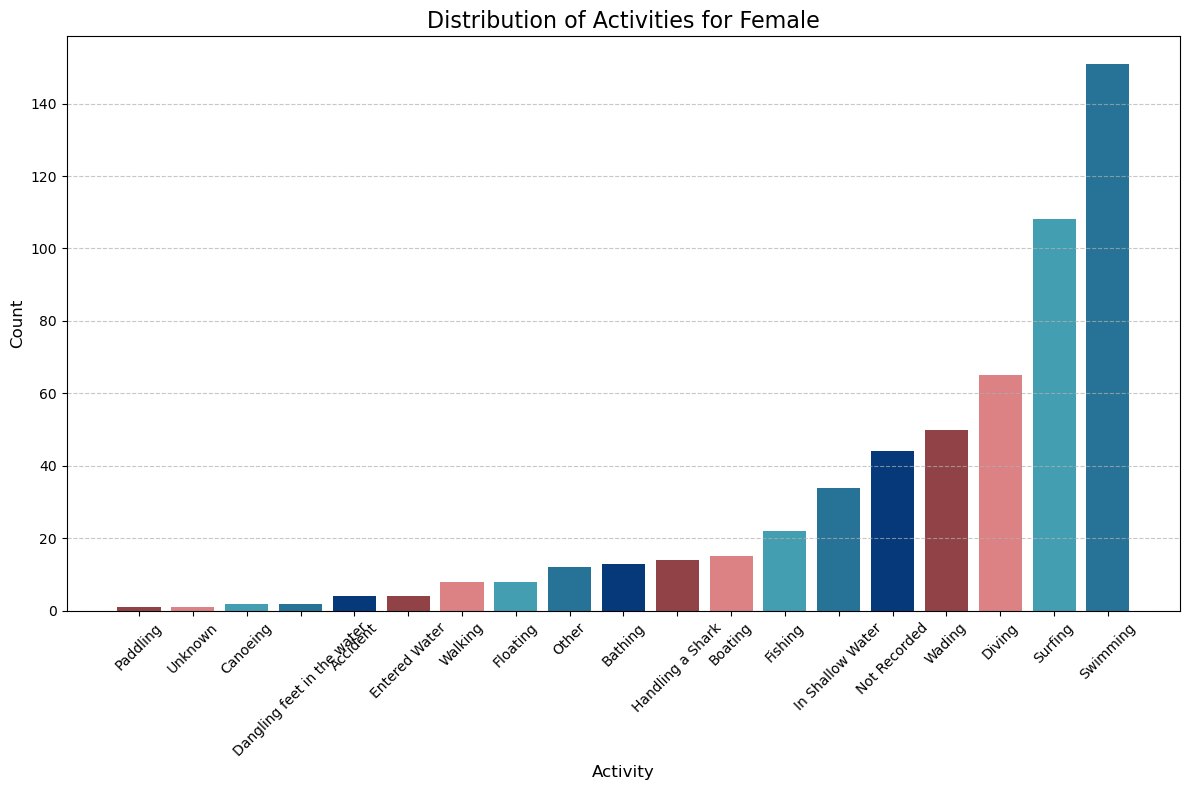

In [64]:
# Filter the data for females
female_data = df[df['sex'] == 'F']

# Count the occurrences of each activity for males
female_activity_counts = female_data['activity'].value_counts().sort_values(ascending=True)

# Define the colors for the bars
colors = ["#904247", "#dc8184", "#439eb1", "#277397", "#053979"]

# Create a bar graph with specified colors
plt.figure(figsize=(12, 8))
bars = plt.bar(male_activity_counts.index, female_activity_counts, color=colors)

plt.title('Distribution of Activities for Female', fontsize=16)
plt.xlabel('Activity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

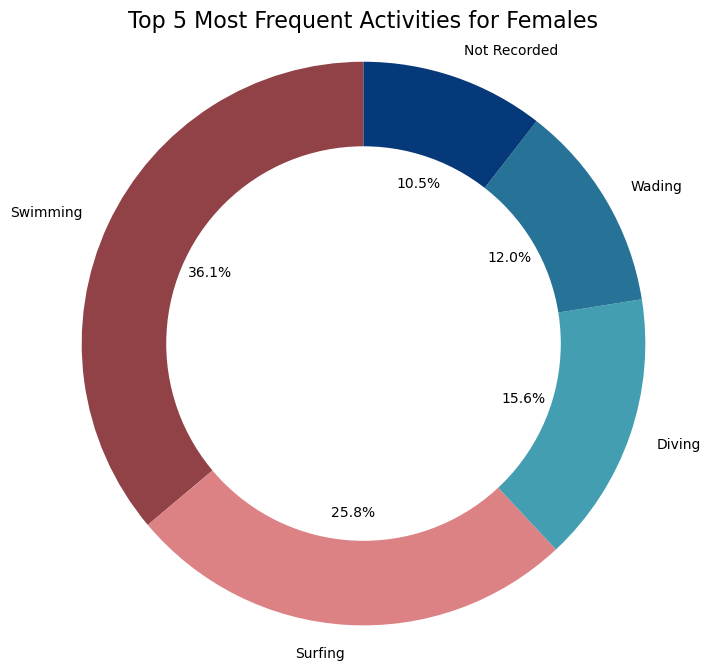

In [68]:
# Filter the data for females
female_data = df[df['sex'] == 'F']

# Count the occurrences of each activity for females
female_activity_counts = female_data['activity'].value_counts().sort_values(ascending=True)

# Select the top N most frequent activities to display
top_n = 5  # Number of top activities to display
top_activities = female_activity_counts.nlargest(top_n)

# Define the colors for the donut chart
colors = ["#904247", "#dc8184", "#439eb1", "#277397", "#053979"]

# Create a donut chart for the top N most frequent activities
plt.figure(figsize=(8, 8))
plt.pie(top_activities, labels=top_activities.index, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops=dict(width=0.4))
plt.title(f'Top {top_n} Most Frequent Activities for Females', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Add a circle at the center to make it a donut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.show()

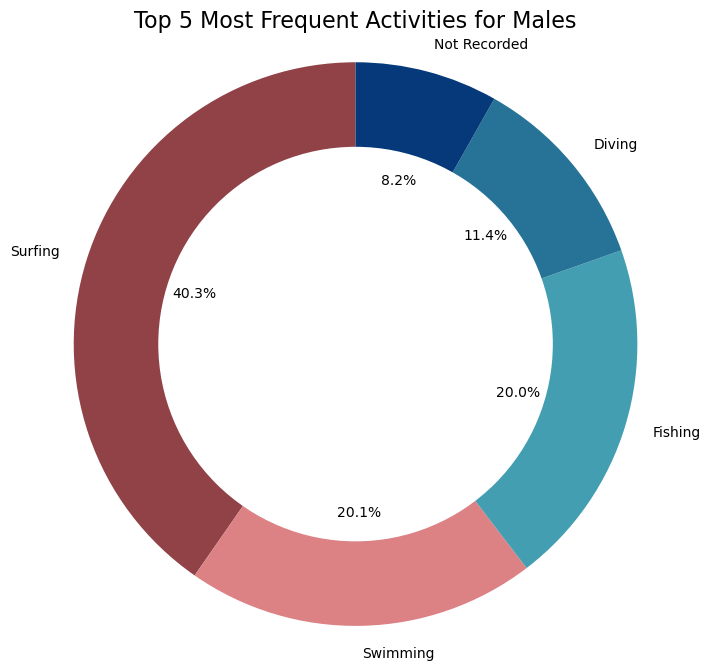

In [69]:
# Filter the data for males
male_data = df[df['sex'] == 'M']

# Count the occurrences of each activity for males
male_activity_counts = male_data['activity'].value_counts().sort_values(ascending=True)

# Select the top N most frequent activities to display
top_n = 5  # Number of top activities to display
top_activities = male_activity_counts.nlargest(top_n)

# Define the colors for the donut chart
colors = ["#904247", "#dc8184", "#439eb1", "#277397", "#053979"]

# Create a donut chart for the top N most frequent activities for males
plt.figure(figsize=(8, 8))
plt.pie(top_activities, labels=top_activities.index, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops=dict(width=0.4))
plt.title(f'Top {top_n} Most Frequent Activities for Males', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Add a circle at the center to make it a donut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.show()

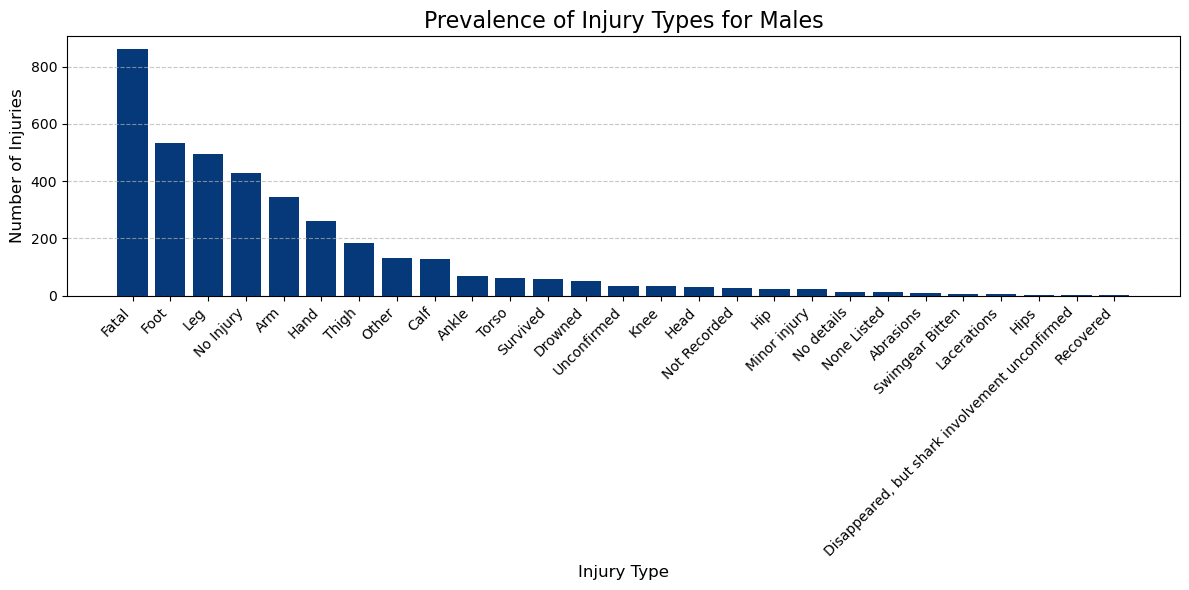

In [85]:
# Filter the data for males
male_data = df[df['sex'] == 'M']

# Count the occurrences of each injury type for males
injuries_per_type_male = male_data['injury'].value_counts()

# Create a bar graph for the prevalence of injury types for males
plt.figure(figsize=(12, 6))
plt.bar(injuries_per_type_male.index, injuries_per_type_male, color='#053979')
plt.xlabel('Injury Type', fontsize=12)
plt.ylabel('Number of Injuries', fontsize=12)
plt.title('Prevalence of Injury Types for Males', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

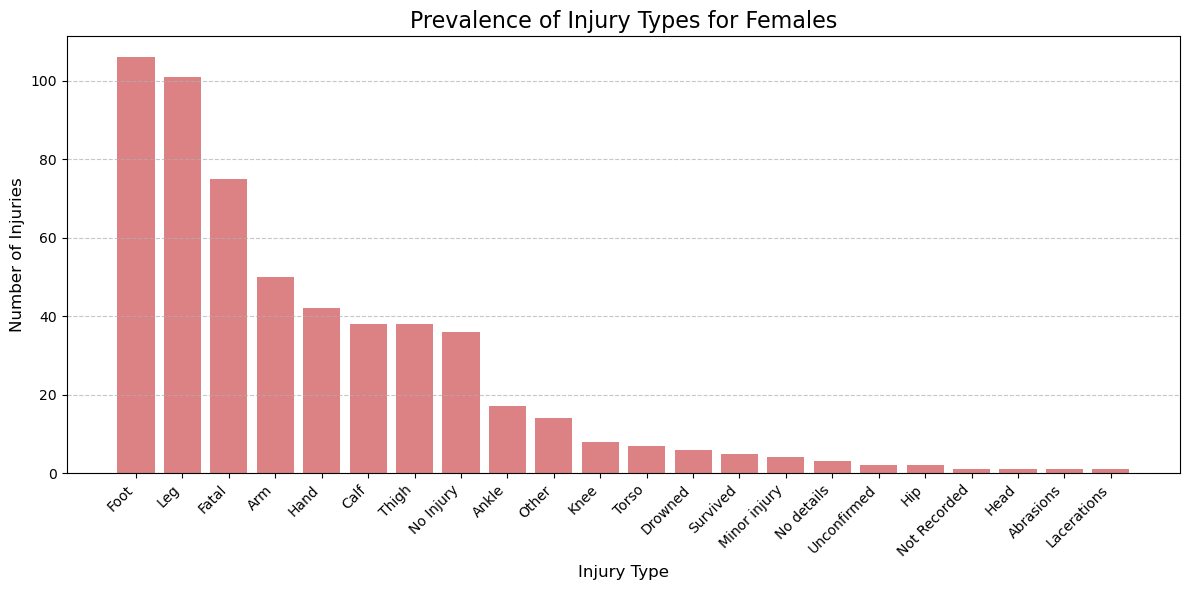

In [87]:
# Filter the data for females
female_data = df[df['sex'] == 'F']

# Count the occurrences of each injury type for females
injuries_per_type_female = female_data['injury'].value_counts()

# Create a bar graph for the prevalence of injury types for females
plt.figure(figsize=(12, 6))
plt.bar(injuries_per_type_female.index, injuries_per_type_female, color='#dc8184')
plt.xlabel('Injury Type', fontsize=12)
plt.ylabel('Number of Injuries', fontsize=12)
plt.title('Prevalence of Injury Types for Females', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()